In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [49]:
%matplotlib inline
sb.set_style('whitegrid')

In [50]:
# import data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
full = pd.concat([train,test],ignore_index=True)
full.count()

PassengerId    1309
Survived        891
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Cleaning

In [54]:
full.loc[full.Cabin.notnull(),'Cabin']=1
full.loc[full.Cabin.isnull(),'Cabin']=0

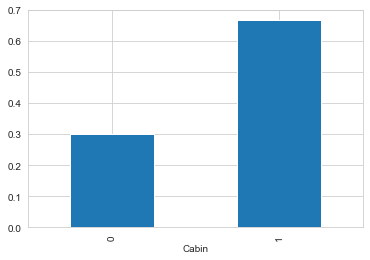

In [55]:
full['Survived'].groupby(full.Cabin).mean().plot.bar()

In [56]:
train.loc[train.Cabin.notnull(),'Cabin']=1
train.loc[train.Cabin.isnull(),'Cabin']=0
cabin=pd.crosstab(train.Cabin,train.Survived)
cabin.rename(index={0:'no cabin',1:'cabin'},columns={0:'Dead',1:'Survived'},inplace=True)
cabin

Survived,Dead,Survived
Cabin,,
no cabin,481,206
cabin,68,136


## re-evaluate age

In [57]:
full['Title']=full['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
full.Age.groupby([full.Title,full.Sex]).describe()

count       mean        std    min    25%   50%    75%  \
Title        Sex                                                              
Capt         male      1.0  70.000000        NaN  70.00  70.00  70.0  70.00   
Col          male      4.0  54.000000   5.477226  47.00  51.50  54.5  57.00   
Don          male      1.0  40.000000        NaN  40.00  40.00  40.0  40.00   
Dona         female    1.0  39.000000        NaN  39.00  39.00  39.0  39.00   
Dr           female    1.0  49.000000        NaN  49.00  49.00  49.0  49.00   
             male      6.0  42.666667  12.580408  23.00  35.00  47.0  52.25   
Jonkheer     male      1.0  38.000000        NaN  38.00  38.00  38.0  38.00   
Lady         female    1.0  48.000000        NaN  48.00  48.00  48.0  48.00   
Major        male      2.0  48.500000   4.949747  45.00  46.75  48.5  50.25   
Master       male     53.0   5.482642   4.161554   0.33   2.00   4.0   9.00   
Miss         female  210.0  21.774238  12.249077   0.17  15.00  22.0  30.00   
Mlle         female    2.0  24.000000   0.000000  24.00  24.00  24.0  24.00   
Mme          female    1.0  24.000000        NaN  24.00  24.00  24.0  24.00   
Mr           male    581.0  32.252151  12.422089  11.00  23.00  29.0  39.00   
Mrs          female  170.0  36.994118  12.901767  14.00  27.00  35.5  46.50   
Ms           female    1.0  28.000000        NaN  28.00  28.00  28.0  28.00   
Rev          male      8.0  41.250000  12.020815  27.00  29.50  41.5  51.75   
Sir          male      1.0  49.000000        NaN  49.00  49.00  49.0  49.00   
the Countess female    1.0  33.000000        NaN  33.00  33.00  33.0  33.00   

                      max  
Title        Sex           
Capt         male    70.0  
Col          male    60.0  
Don          male    40.0  
Dona         female  39.0  
Dr           female  49.0  
             male    54.0  
Jonkheer     male    38.0  
Lady         female  48.0  
Major        male    52.0  
Master       male    14.5  
Miss         female  63.0  
Mlle         female  24.0  
Mme          female  24.0  
Mr           male    80.0  
Mrs          female  76.0  
Ms           female  28.0  
Rev          male    57.0  
Sir          male    49.0  
the Countess female  33.0

In [58]:
full[(full.Title=='Dr')&(full.Sex=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,1,S,Dr


In [59]:
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

full.Title = full.Title.map(nn)
full.loc[full.PassengerId==797, 'Title'] = 'Rarewomen'

In [60]:
full.Title.value_counts()

Mr           765
Miss         260
Mrs          197
Master        61
Rareman       17
Rarewoman      8
Rarewomen      1
Name: Title, dtype: int64

In [61]:
full.Age.groupby([full.Title, full.Sex]).describe()

,,count,mean,std,min,25%,50%,75%,max
Title,Sex,,,,,,,,
Master,male,53.0,5.482642,4.161554,0.33,2.0,4.0,9.00,14.5
Miss,female,210.0,21.774238,12.249077,0.17,15.0,22.0,30.00,63.0
Mr,male,589.0,32.374363,12.450528,11.00,23.0,29.0,40.00,80.0
Mrs,female,170.0,36.994118,12.901767,14.00,27.0,35.5,46.50,76.0
Rareman,male,16.0,47.875000,11.164676,23.00,43.0,49.5,53.25,70.0
Rarewoman,female,7.0,31.428571,9.235026,24.00,24.0,28.0,36.00,48.0
Rarewomen,female,1.0,49.000000,NaN,49.00,49.0,49.0,49.00,49.0


In [62]:
full[full.Title=='Master'].Survived.groupby(full.Pclass).mean()

Pclass
1    1.000000
2    1.000000
3    0.392857
Name: Survived, dtype: float64

In [63]:
full[full.Sex=='male'][full.Age<=15].Survived.mean()

/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.525

In [64]:
train[(train.Sex=='female')].Survived.mean()

0.7420382165605095

In [65]:
full[full.Title=='Miss'].Survived.groupby(full.Pclass).mean()

Pclass
1    0.956522
2    0.941176
3    0.500000
Name: Survived, dtype: float64

In [66]:
full[full.Title=='Miss'][full.Survived==0][full.Pclass==3]

/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,0,S,Miss
24,25,0.0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,0,S,Miss
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,0,S,Miss
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,0,S,Miss
100,101,0.0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,0,S,Miss
111,112,0.0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,0,C,Miss
113,114,0.0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,0,S,Miss
114,115,0.0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,0,C,Miss
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,0,S,Miss
147,148,0.0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,0,S,Miss


* male aged under 15 are mostly titled as 'Master', so we would give it an extra premier 'Boy' and we would do the same for 'Mr' age under 15 as well
* for female under 10 or without age information but with at least 1 Parch and 0 siblings, we would give it an extra premier 'Girl'
* for the rest of passengers who have no age information, we would give the median value of their title group
* since we witness the hump shaped curve of survival probability with age, we would modify the Age by the map of $ age = sin(0.05\times age) $ by assuming the passengers with age 30 are more likely to survive and this prossibility is decreasing when the passengers are younger or older

In [67]:
# define the missed age as 999
full.Age.fillna(999,inplace=True)

In [68]:
def boy(aa):
    if (aa.Title=='Master'):
        return 1
    elif (aa.Title == 'Master')&(aa.Age<=15):
        return 1
    else:
        return 0

In [69]:
full['Boy']=full.apply(boy,axis=1)

In [70]:
def girl(aa):
    if (aa.Sex=='female')&(aa.Age==999)&(aa.Parch>=1)&(aa.SibSp==0):
        return 1
    elif (aa.Sex=='female')&(aa.Age<10):
        return 1
    else:
        return 0


In [71]:
full['Girl']=full.apply(girl,axis=1)

In [72]:
full.Boy.value_counts()

0    1248
1      61
Name: Boy, dtype: int64

In [73]:
full.Girl.value_counts()

0    1264
1      45
Name: Girl, dtype: int64

In [74]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    full.loc[(full.Age==999)&(full.Title==i),'Age']=full.loc[full.Title==i,'Age'].median()

In [75]:
full['Age_sin']=full['Age'].apply(lambda x: np.sin(0.05*x) )

In [76]:
full[full.Survived.notnull()].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
Boy            0
Girl           0
Age_sin        0
dtype: int64

In [77]:
full[full.Survived.isnull()].isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Title            0
Boy              0
Girl             0
Age_sin          0
dtype: int64

here we finish estimating Age, let's look at fare

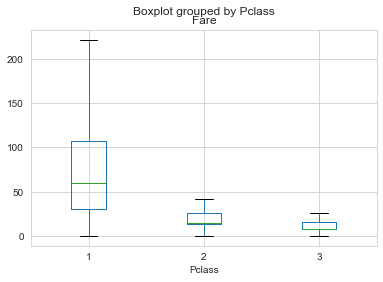

In [78]:
full.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


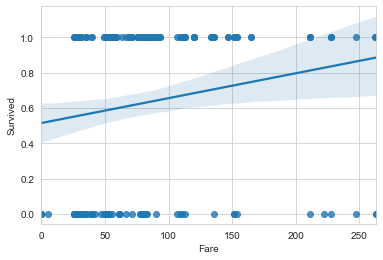

In [79]:
sb.regplot(x='Fare',y='Survived',data=train[train.Fare<300][train.Pclass==1])

/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


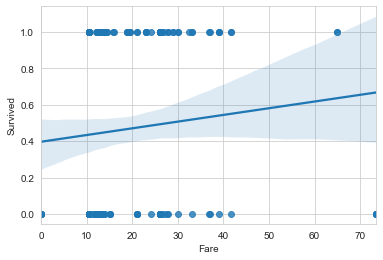

In [80]:
sb.regplot(x='Fare',y='Survived',data=train[train.Fare<300][train.Pclass==2])

/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


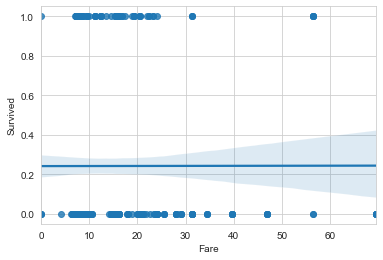

In [81]:
sb.regplot(x='Fare',y='Survived',data=train[train.Fare<300][train.Pclass==3])

here we see, for higher classes, the positive correlation between fare price and chance to survive is larger. However, we cannot tell is this a reaon of passengers in higher class have higher chance to survive or other reasons relating to fare. So we would just leave it here 

In [82]:
# fill the missed fare data using meadian (in test dataset)
full[full.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Boy,Girl,Age_sin
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,0,S,Mr,0,0,0.116329


In [83]:
full[full.Pclass==3][full.Sex=='male'].Fare.median()

/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7.8958

In [84]:
full.loc[full.PassengerId==1044,'Fare']=7.8958

In [85]:
# fill the rows with embarked information missed (in training dataset) by 
full[full.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Boy,Girl,Age_sin
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,1,NaN,Miss,0,0,0.946300
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,1,NaN,Mrs,0,0,0.041581


In [86]:
full.Embarked.mode()

0    S
dtype: object

In [87]:
full['Embarked'].fillna('S',inplace=True)

In [88]:
full.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Boy              0
Girl             0
Age_sin          0
dtype: int64

#### Now we are free from value missing

# 探索性可视化（Exploratory Visualization）

因为在上一篇中已经详尽的讨论过，这里就跳过了

# 特征工程（Feature Engineering）

## firstly, look at the survival of passengers by gender and cabin classes

In [89]:
agehist_1f = pd.concat([train[train.Sex=='female'][train.Pclass==1][train.Survived==1]['Age'],
                        train[train.Sex=='female'][train.Pclass==1][train.Survived==0]['Age']],axis=1)
agehist_1f.columns=['Survived','Dead'] 
                  
agehist_1m = pd.concat([train[train.Sex=='male'][train.Pclass==1][train.Survived==1]['Age'],
                        train[train.Sex=='male'][train.Pclass==1][train.Survived==0]['Age']],axis=1)
agehist_1m.columns=['Survived','Dead']    


agehist_2f = pd.concat([train[train.Sex=='female'][train.Pclass==2][train.Survived==1]['Age'],
                        train[train.Sex=='female'][train.Pclass==2][train.Survived==0]['Age']],axis=1)
agehist_2f.columns=['Survived','Dead'] 
                  
agehist_2m = pd.concat([train[train.Sex=='male'][train.Pclass==2][train.Survived==1]['Age'],
                        train[train.Sex=='male'][train.Pclass==2][train.Survived==0]['Age']],axis=1)
agehist_2m.columns=['Survived','Dead']   


agehist_3f = pd.concat([train[train.Sex=='female'][train.Pclass==3][train.Survived==1]['Age'],
                        train[train.Sex=='female'][train.Pclass==3][train.Survived==0]['Age']],axis=1)
agehist_3f.columns=['Survived','Dead'] 
                  
agehist_3m = pd.concat([train[train.Sex=='male'][train.Pclass==3][train.Survived==1]['Age'],
                        train[train.Sex=='male'][train.Pclass==3][train.Survived==0]['Age']],axis=1)
agehist_3m.columns=['Survived','Dead'] 

/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boo

Text(0.5, 1.0, 'Male in Third Class')

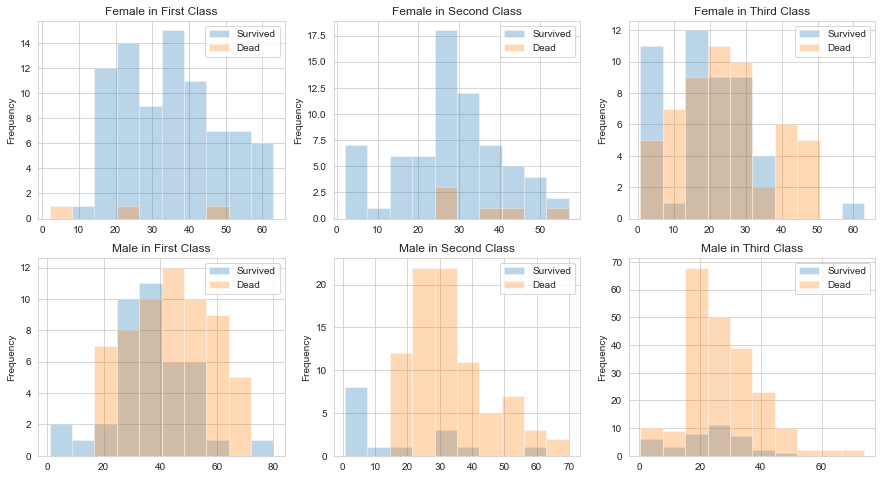

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=3)

agehist_1f.plot(kind='hist',figsize=(15,8),alpha=0.3,ax=axes[0,0])  
axes[0,0].set_title('Female in First Class')

agehist_1m.plot(kind='hist',alpha=0.3,ax=axes[1,0])  
axes[1,0].set_title('Male in First Class')

agehist_2f.plot(kind='hist',alpha=0.3,ax=axes[0,1])  
axes[0,1].set_title('Female in Second Class')

agehist_2m.plot(kind='hist',alpha=0.3,ax=axes[1,1])  
axes[1,1].set_title('Male in Second Class')

agehist_3f.plot(kind='hist',alpha=0.3,ax=axes[0,2])  
axes[0,2].set_title('Female in Third Class')

agehist_3m.plot(kind='hist',alpha=0.3,ax=axes[1,2])  
axes[1,2].set_title('Male in Third Class')

In [91]:
train.Survived.groupby([train.Pclass, train.Sex]).mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

here we notice 
* female with age under 10 are more likely to survive
* male with age under 15 are more likely to survive
* the curve of survival is hump shaped for both male and female along with age
* we believe that the male in the first class have some advantage to survive and female in the third class have some disadvantage to survive, so we would add one extra indicator for each of those two groups

In [92]:
def male_1st(aa):
    if (aa.Sex=='male')&(aa.Pclass==1):
        return 1
    else:
        return 0
    
def female_3rd(aa):
    if (aa.Sex=='female')&(aa.Pclass==3):
        return 1
    else:
        return 0

In [93]:
full['Male_1st']=full.apply(male_1st,axis=1)
full['Female_3rd']=full.apply(female_3rd,axis=1)

In [94]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Boy,Girl,Age_sin,Male_1st,Female_3rd
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr,0,0,0.891207,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs,0,0,0.946300,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss,0,0,0.963558,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs,0,0,0.983986,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr,0,0,0.983986,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,34.5,0,0,A.5. 3236,8.0500,0,S,Mr,0,0,0.988134,0,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,C,Rarewoman,0,0,0.928960,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,Mr,0,0,0.937923,0,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,34.5,0,0,359309,8.0500,0,S,Mr,0,0,0.988134,0,0


# 基本建模&评估（Basic Modeling & Evaluation）

In [95]:
predictors=['Pclass','Sex','Age_sin','SibSp','Parch','Fare','Cabin','Embarked','Title','Boy','Girl','Male_1st','Female_3rd']

In [96]:
full_dummies=pd.get_dummies(full[predictors])

In [97]:
full_dummies

,Pclass,Age_sin,SibSp,Parch,Fare,Boy,Girl,Male_1st,Female_3rd,Sex_female,...,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rareman,Title_Rarewoman,Title_Rarewomen
0,3,0.891207,1,0,7.2500,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0.946300,1,0,71.2833,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,3,0.963558,0,0,7.9250,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3,1,0.983986,1,0,53.1000,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,3,0.983986,0,0,8.0500,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0.988134,0,0,8.0500,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1305,1,0.928960,0,0,108.9000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1306,3,0.937923,0,0,7.2500,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1307,3,0.988134,0,0,8.0500,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [99]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),SVC()]

In [100]:
full.shape,full_dummies.shape

((1309, 18), (1309, 23))

In [101]:
X=full_dummies[:891]
y=full.Survived[:891]
test_X=full_dummies[891:]

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)

In [104]:
# evaluate models by using cross-validation
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.7755508128805474,[0.75977654 0.70786517 0.84269663 0.74157303 0.8258427 ]
LR:0.8226853304877284,[0.81005587 0.80337079 0.81460674 0.80337079 0.88202247]


/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/johnny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

NB:0.7744586027242484,[0.73184358 0.80898876 0.78651685 0.70224719 0.84269663]
Tree:0.7901387232439896,[0.77653631 0.76966292 0.83707865 0.76966292 0.79775281]
RF:0.8069236080597577,[0.83798883 0.76404494 0.84269663 0.75280899 0.83707865]
GDBT:0.8406126420187057,[0.8547486  0.81460674 0.86516854 0.80337079 0.86516854]
SVM:0.6690101060824808,[0.58100559 0.71348315 0.67977528 0.68539326 0.68539326]


In [105]:
# used scaled data
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.8080785889146945,[0.81005587 0.76966292 0.83146067 0.79775281 0.83146067]
LR:0.8238214801330738,[0.79888268 0.79775281 0.82022472 0.80898876 0.89325843]
NB:0.6823928190320758,[0.67039106 0.65168539 0.62921348 0.68539326 0.7752809 ]
Tree:0.781149959199046,[0.77653631 0.75280899 0.82022472 0.74719101 0.80898876]
RF:0.8046889711882492,[0.82681564 0.76966292 0.83146067 0.75842697 0.83707865]
GDBT:0.8394890465130876,[0.8547486  0.80898876 0.86516854 0.80337079 0.86516854]
SVM:0.8327600276191074,[0.84357542 0.82022472 0.85955056 0.7752809  0.86516854]


# 参数调整（Hyperparameters tuning）

In [106]:
from sklearn.model_selection import GridSearchCV

## k-Nearest Neighbors

In [107]:
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 6}, 0.8215491808423827)

## Logistic Regression

In [108]:
param_grid={'C':[0.01,0.1,1,10]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 1}, 0.8238214801330738)

## Support Vector Machine

In [109]:
param_grid={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 10, 'gamma': 0.01}, 0.8316615403929445)

## Gradient Boosting Decision Tree

In [110]:
param_grid={'n_estimators':[30,50,80,120,200],'learning_rate':[0.05,0.1,0.5,1],'max_depth':[1,2,3,4,5]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50},
 0.8406189190885694)

In [111]:
# second round
param_grid={'n_estimators':[30,40,50,60,70],'learning_rate':[0.03,0.04,0.05,0.07],'max_depth':[4,4.5,5,5.5,6]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.04, 'max_depth': 5, 'n_estimators': 60},
 0.8428723871696692)

# 集成方法（EnsembleMethods）

In [112]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(LogisticRegression(C=0.06),n_estimators=100)

In [113]:
from sklearn.ensemble import VotingClassifier

In [114]:
clf1=LogisticRegression(C=0.1)
clf2=RandomForestClassifier(n_estimators=500)
clf3=GradientBoostingClassifier(n_estimators=40,learning_rate=0.07,max_depth=5)
clf4=SVC(C=10,gamma=0.01,probability=True)
clf5=KNeighborsClassifier(n_neighbors=6)

In [115]:
eclf_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)])
eclfW_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],weights=[1,1,2,2,1])

In [116]:
# soft voting
eclf_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft')# add weights
eclfW_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft',weights=[1,1,2,2,1])

In [117]:
models=[KNeighborsClassifier(n_neighbors=6),LogisticRegression(C=0.1),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=500),
        GradientBoostingClassifier(n_estimators=40,learning_rate=0.07,max_depth=5),SVC(C=10,gamma=0.01),
        eclf_hard,eclf_soft,eclfW_hard,eclfW_soft,bagging]

In [118]:
names=['KNN','LR','NB','CART','RF','GBT','SVM','VC_hard','VC_soft','VCW_hard','VCW_soft','Bagging']
for name,model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}: {},{}".format(name,score.mean(),score))

KNN: 0.8215491808423827,[0.82122905 0.80337079 0.83707865 0.80337079 0.84269663]
LR: 0.8215617349821104,[0.81005587 0.80337079 0.81460674 0.79775281 0.88202247]
NB: 0.6823928190320758,[0.67039106 0.65168539 0.62921348 0.68539326 0.7752809 ]
CART: 0.7811562362689097,[0.77094972 0.74719101 0.84269663 0.75280899 0.79213483]
RF: 0.8069361621994853,[0.82681564 0.76966292 0.83707865 0.75280899 0.84831461]
GBT: 0.8383842822170611,[0.83798883 0.81460674 0.87078652 0.80898876 0.85955056]
SVM: 0.8316615403929445,[0.82122905 0.82022472 0.85955056 0.79775281 0.85955056]
VC_hard: 0.8327788588286987,[0.82681564 0.80337079 0.85393258 0.80337079 0.87640449]
VC_soft: 0.8305316678174629,[0.82681564 0.80898876 0.84269663 0.79775281 0.87640449]
VCW_hard: 0.8316552633230808,[0.82681564 0.80337079 0.85393258 0.79775281 0.87640449]
VCW_soft: 0.8338961772644529,[0.83240223 0.80337079 0.85393258 0.80337079 0.87640449]
Bagging: 0.8204318624066286,[0.81564246 0.80337079 0.80898876 0.79775281 0.87640449]


In [119]:
from sklearn.model_selection import StratifiedKFold
n_train=train.shape[0]
n_test=test.shape[0]
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

In [120]:
def get_oof(clf,X,y,test_X):
    oof_train=np.zeros((n_train,))
    oof_test_mean=np.zeros((n_test,))
    oof_test_single=np.empty((5,n_test))
    for i, (train_index,val_index) in enumerate(kf.split(X,y)):
        kf_X_train=X[train_index]
        kf_y_train=y[train_index]
        kf_X_val=X[val_index]
        
        clf.fit(kf_X_train,kf_y_train)
        
        oof_train[val_index]=clf.predict(kf_X_val)
        oof_test_single[i,:]=clf.predict(test_X)
    oof_test_mean=oof_test_single.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test_mean.reshape(-1,1)

In [121]:
LR_train,LR_test=get_oof(LogisticRegression(C=0.06),X_scaled,y,test_X_scaled)
KNN_train,KNN_test=get_oof(KNeighborsClassifier(n_neighbors=8),X_scaled,y,test_X_scaled)
SVM_train,SVM_test=get_oof(SVC(C=4,gamma=0.015),X_scaled,y,test_X_scaled)
GBDT_train,GBDT_test=get_oof(GradientBoostingClassifier(n_estimators=100,learning_rate=0.12,max_depth=4),X_scaled,y,test_X_scaled)

In [122]:
X_stack=np.concatenate((LR_train,KNN_train,SVM_train,GBDT_train),axis=1)
y_stack=y
X_test_stack=np.concatenate((LR_test,KNN_test,SVM_test,GBDT_test),axis=1)

In [123]:
X_stack.shape,y_stack.shape,X_test_stack.shape

((891, 4), (891,), (418, 4))

In [124]:
stack_score=cross_val_score(RandomForestClassifier(n_estimators=1000),X_stack,y_stack,cv=5)

In [125]:
# cross-validation score of stacking
stack_score.mean(),stack_score

(0.828253091456908,
 array([0.8547486 , 0.79775281, 0.83146067, 0.79775281, 0.85955056]))

In [126]:
pred=RandomForestClassifier(n_estimators=500).fit(X_stack,y_stack).predict(X_test_stack)

In [127]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':pred}).astype(int)

In [128]:
submission.to_csv('submission_2.csv',index=False,encoding='utf-8')